### To Do: 
1. Process the temperature columns into weekly min, max, average
2. Process DHI and DNI into cummulative DHI, DNI and average DHI/DNI ratio 
3. Use these as inputs for forecasting GHI 

In [1]:
import pandas as pd
from darts import TimeSeries
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

#Loading the data
df_2018 = pd.read_csv("data/sg_2018.csv")
df_2019 = pd.read_csv("data/sg_2019.csv")
df_2020 = pd.read_csv("data/sg_2020.csv")

In [2]:
def create_dt_col(df: pd.DataFrame) -> pd.DataFrame:
    """Creates a datetime column from existing year, month, day and hour columns"""
    param_dict = dict(year=df["Year"], month=df["Month"], day=df["Day"], hour=df["Hour"])
    df["Datetime"] = pd.to_datetime(param_dict)
    return df

In [3]:
# Getting the date columns 
df_2018_interim = create_dt_col(df_2018)
df_2019_interim = create_dt_col(df_2019)
df_2020_interim = create_dt_col(df_2020)

In [4]:
df_2018_interim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Year                8760 non-null   int64         
 1   Month               8760 non-null   int64         
 2   Day                 8760 non-null   int64         
 3   Hour                8760 non-null   int64         
 4   Minute              8760 non-null   int64         
 5   Clearsky DHI        8760 non-null   int64         
 6   Clearsky DNI        8760 non-null   int64         
 7   Clearsky GHI        8760 non-null   int64         
 8   Cloud Type          8760 non-null   int64         
 9   Fill Flag           8760 non-null   int64         
 10  Ozone               8760 non-null   float64       
 11  Solar Zenith Angle  8760 non-null   float64       
 12  Precipitable Water  8760 non-null   float64       
 13  Temperature         8760 non-null   float64     

In [5]:
df_2018_interim.head(24)

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Fill Flag,Ozone,Solar Zenith Angle,Precipitable Water,Temperature,Dew Point,DHI,DNI,GHI,Relative Humidity,Surface Albedo,Pressure,Wind Direction,Wind Speed,Datetime
0,2018,1,1,0,0,0,0,0,7,0,0.250,152.74,5.9,25.9,25.5,0,0,0,97.47,0.14,1009,339,2.8,2018-01-01 00:00:00
1,2018,1,1,1,0,0,0,0,6,0,0.251,158.19,5.9,25.8,25.3,0,0,0,97.36,0.14,1008,341,3.0,2018-01-01 01:00:00
2,2018,1,1,2,0,0,0,0,7,0,0.251,154.87,5.9,25.7,25.2,0,0,0,97.03,0.14,1008,345,3.2,2018-01-01 02:00:00
3,2018,1,1,3,0,0,0,0,7,0,0.250,145.21,5.9,25.6,25.1,0,0,0,96.91,0.14,1007,347,3.3,2018-01-01 03:00:00
4,2018,1,1,4,0,0,0,0,6,0,0.250,132.99,5.8,25.5,24.9,0,0,0,96.74,0.14,1007,348,3.0,2018-01-01 04:00:00
5,2018,1,1,5,0,0,0,0,7,0,0.250,119.78,5.7,25.3,24.8,0,0,0,96.93,0.14,1007,345,2.6,2018-01-01 05:00:00
6,2018,1,1,6,0,0,0,0,7,0,0.250,106.15,5.6,25.2,24.6,0,0,0,96.51,0.14,1008,337,2.4,2018-01-01 06:00:00
7,2018,1,1,7,0,0,0,0,7,0,0.251,92.37,5.6,25.4,24.6,0,0,0,95.30,0.14,1009,327,2.4,2018-01-01 07:00:00
8,2018,1,1,8,0,66,370,139,9,3,0.235,78.56,6.3,25.4,24.8,7,0,7,96.38,0.14,1005,359,2.2,2018-01-01 08:00:00
9,2018,1,1,9,0,110,609,368,9,0,0.235,65.00,6.4,25.8,25.0,17,0,17,95.09,0.14,1006,1,1.8,2018-01-01 09:00:00


In [6]:
# Combining the 2018 and 2019 data together to form training data
full_df = pd.concat([df_2018_interim, df_2019_interim, df_2020_interim], ignore_index=True)
full_df.tail(30)

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Fill Flag,Ozone,Solar Zenith Angle,Precipitable Water,Temperature,Dew Point,DHI,DNI,GHI,Relative Humidity,Surface Albedo,Pressure,Wind Direction,Wind Speed,Datetime
26250,2020,12,30,18,0,72,501,202,8,3,0.238,75.00,5.6,26.8,24.9,102,157,142,89.56,0.14,1004,22,2.2,2020-12-30 18:00:00
26251,2020,12,30,19,0,12,48,14,8,3,0.239,88.47,5.5,26.1,24.8,9,0,9,92.62,0.14,1005,25,2.1,2020-12-30 19:00:00
26252,2020,12,30,20,0,0,0,0,7,0,0.239,102.58,5.4,26.0,24.8,0,0,0,92.97,0.14,1006,26,2.3,2020-12-30 20:00:00
26253,2020,12,30,21,0,0,0,0,7,0,0.240,116.25,5.3,25.8,24.8,0,0,0,93.96,0.14,1006,28,2.4,2020-12-30 21:00:00
26254,2020,12,30,22,0,0,0,0,8,0,0.241,129.60,5.3,25.7,24.7,0,0,0,94.35,0.14,1006,29,2.5,2020-12-30 22:00:00
26255,2020,12,30,23,0,0,0,0,7,0,0.242,142.17,5.2,25.5,24.7,0,0,0,95.16,0.14,1006,30,2.7,2020-12-30 23:00:00
26256,2020,12,31,0,0,0,0,0,7,0,0.242,152.74,5.2,25.4,24.6,0,0,0,95.30,0.14,1006,30,2.9,2020-12-31 00:00:00
26257,2020,12,31,1,0,0,0,0,7,0,0.242,158.16,5.2,25.3,24.5,0,0,0,95.26,0.14,1005,30,3.0,2020-12-31 01:00:00
26258,2020,12,31,2,0,0,0,0,7,0,0.242,154.81,5.2,25.2,24.4,0,0,0,95.23,0.14,1005,28,3.0,2020-12-31 02:00:00
26259,2020,12,31,3,0,0,0,0,7,0,0.242,145.14,5.2,25.1,24.3,0,0,0,95.10,0.14,1004,23,3.0,2020-12-31 03:00:00


In [7]:
# Change the index to datetime for processing 
full_df.index = full_df["Datetime"]

In [8]:
weekly_df = full_df.groupby(pd.Grouper(freq="W")).sum()
weekly_df.head(10)

/tmp/ipykernel_1102/2154940918.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_df = full_df.groupby(pd.Grouper(freq="W")).sum()


,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Fill Flag,Ozone,Solar Zenith Angle,Precipitable Water,Temperature,Dew Point,DHI,DNI,GHI,Relative Humidity,Surface Albedo,Pressure,Wind Direction,Wind Speed
Datetime,,,,,,,,,,,,,,,,,,,,,,,
2018-01-07,339024,168,672,1932,0,9583,56079,47384,1103,63,39.384,15244.46,1011.6,4432.4,4174.2,16412,5987,20719,15388.60,23.52,168823,17624,279.2
2018-01-14,339024,168,1848,1932,0,8984,58156,48095,1047,46,39.502,15241.61,967.7,4228.0,4026.9,11772,6386,15813,15666.51,23.52,169258,45238,422.6
2018-01-21,339024,168,3024,1932,0,10602,54613,47978,1109,51,39.368,15237.44,960.6,4302.6,4097.4,20880,19857,34796,15649.56,23.52,168872,25409,351.8
2018-01-28,339024,168,4200,1932,0,9148,58284,49068,1143,40,39.509,15231.82,995.6,4388.0,4170.7,21404,18289,33828,15586.68,23.52,168670,44281,296.8
2018-02-04,339024,264,2400,1932,0,10944,54839,49128,868,46,39.585,15225.01,909.6,4414.6,4161.5,17676,22144,32824,15411.47,23.52,169197,14520,440.0
2018-02-11,339024,336,1344,1932,0,12735,51811,49449,388,32,40.590,15216.59,724.7,4238.2,3782.6,18226,30479,38884,14357.21,23.52,169386,3835,584.0
2018-02-18,339024,336,2520,1932,0,12387,52566,50084,568,69,39.754,15206.59,769.0,4379.1,3997.2,20174,30216,41272,14766.30,23.52,169469,11300,427.1
2018-02-25,339024,336,3696,1932,0,10179,57318,51275,766,41,39.245,15194.73,814.8,4435.0,4092.6,19953,27723,38881,14977.62,23.52,168969,5248,441.7
2018-03-04,339024,432,2184,1932,0,11204,55020,51124,1032,54,39.311,15180.65,877.3,4518.2,4148.5,23494,23085,39519,14840.87,23.52,168898,6937,357.8


In [9]:
series = TimeSeries.from_dataframe(weekly_df, value_cols="GHI", fill_missing_dates=True, freq="W")
series

<TimeSeries (DataArray) (Datetime: 157, component: 1, sample: 1)>
array([[[20719.]],

       [[15813.]],

       [[34796.]],

       [[33828.]],

       [[32824.]],

       [[38884.]],

       [[41272.]],

       [[38881.]],

       [[39519.]],

       [[32639.]],

...

       [[29201.]],

       [[25418.]],

       [[32644.]],

       [[30397.]],

       [[22320.]],

       [[30154.]],

       [[31288.]],

       [[26426.]],

       [[30735.]],

       [[17347.]]])
Coordinates:
  * Datetime   (Datetime) datetime64[ns] 2018-01-07 2018-01-14 ... 2021-01-03
  * component  (component) object 'GHI'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [10]:
train, val = series[:-52], series[-52:]
print(len(train))
print(len(val))

105
52


In [11]:
from darts.models import FFT

model = FFT()
model.fit(train)
prediction = model.predict(len(val))

/home/yutian/.cache/pypoetry/virtualenvs/pv-prediction-P2-Gyx4E-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


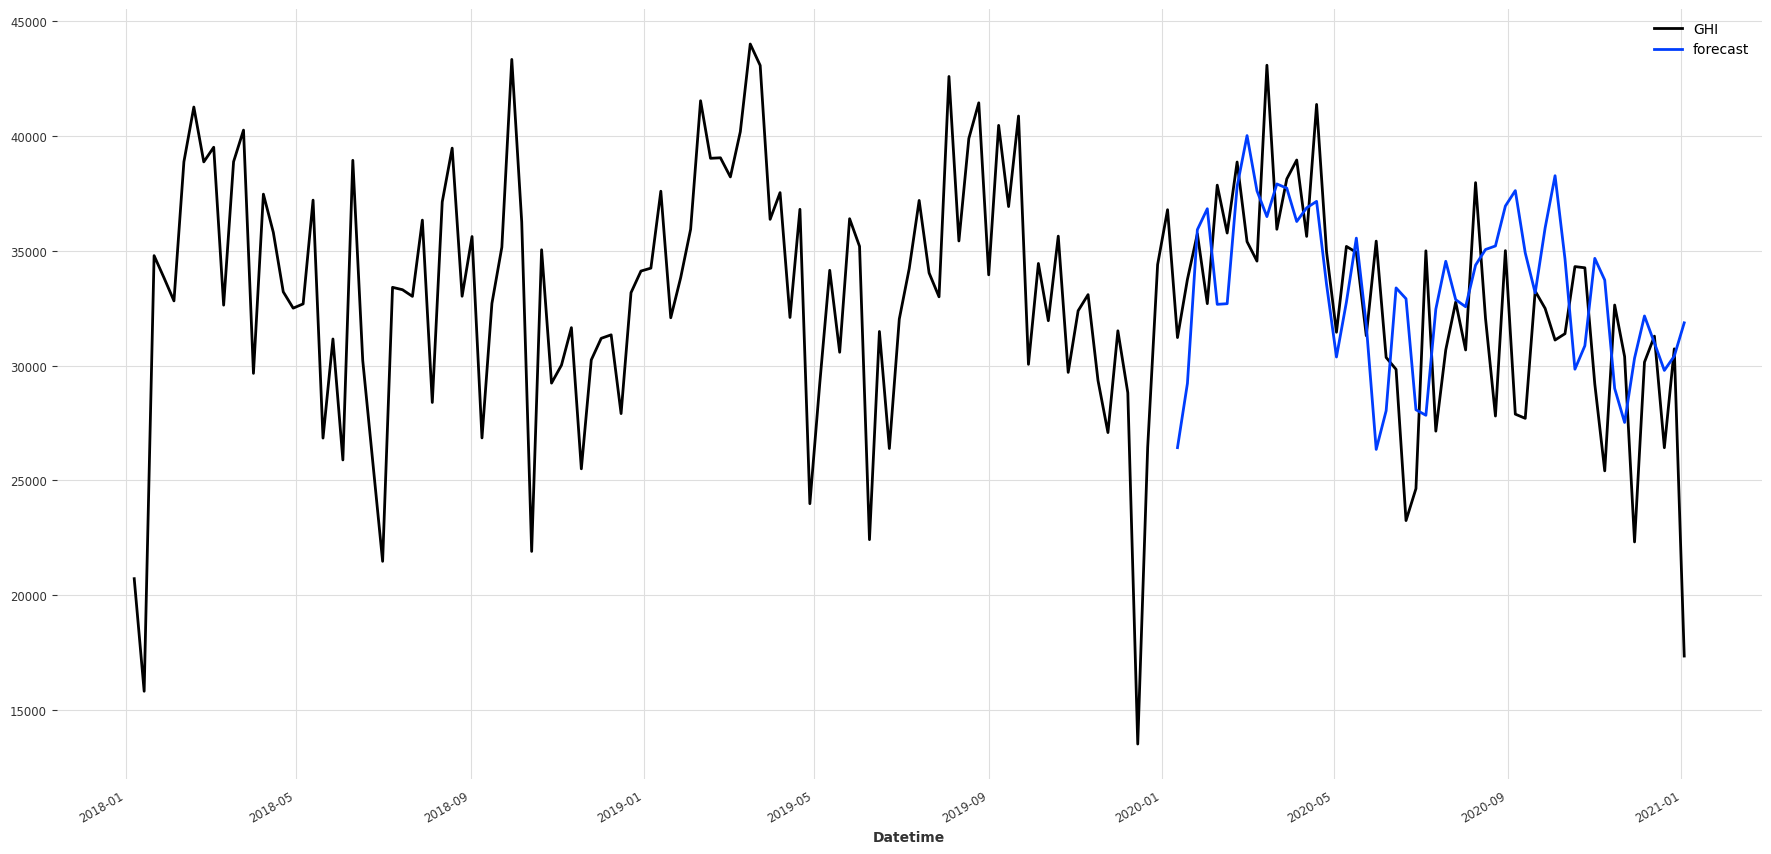

In [12]:
plt.figure(figsize=(22,10))
series.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [13]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val))

/home/yutian/.cache/pypoetry/virtualenvs/pv-prediction-P2-Gyx4E-py3.10/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


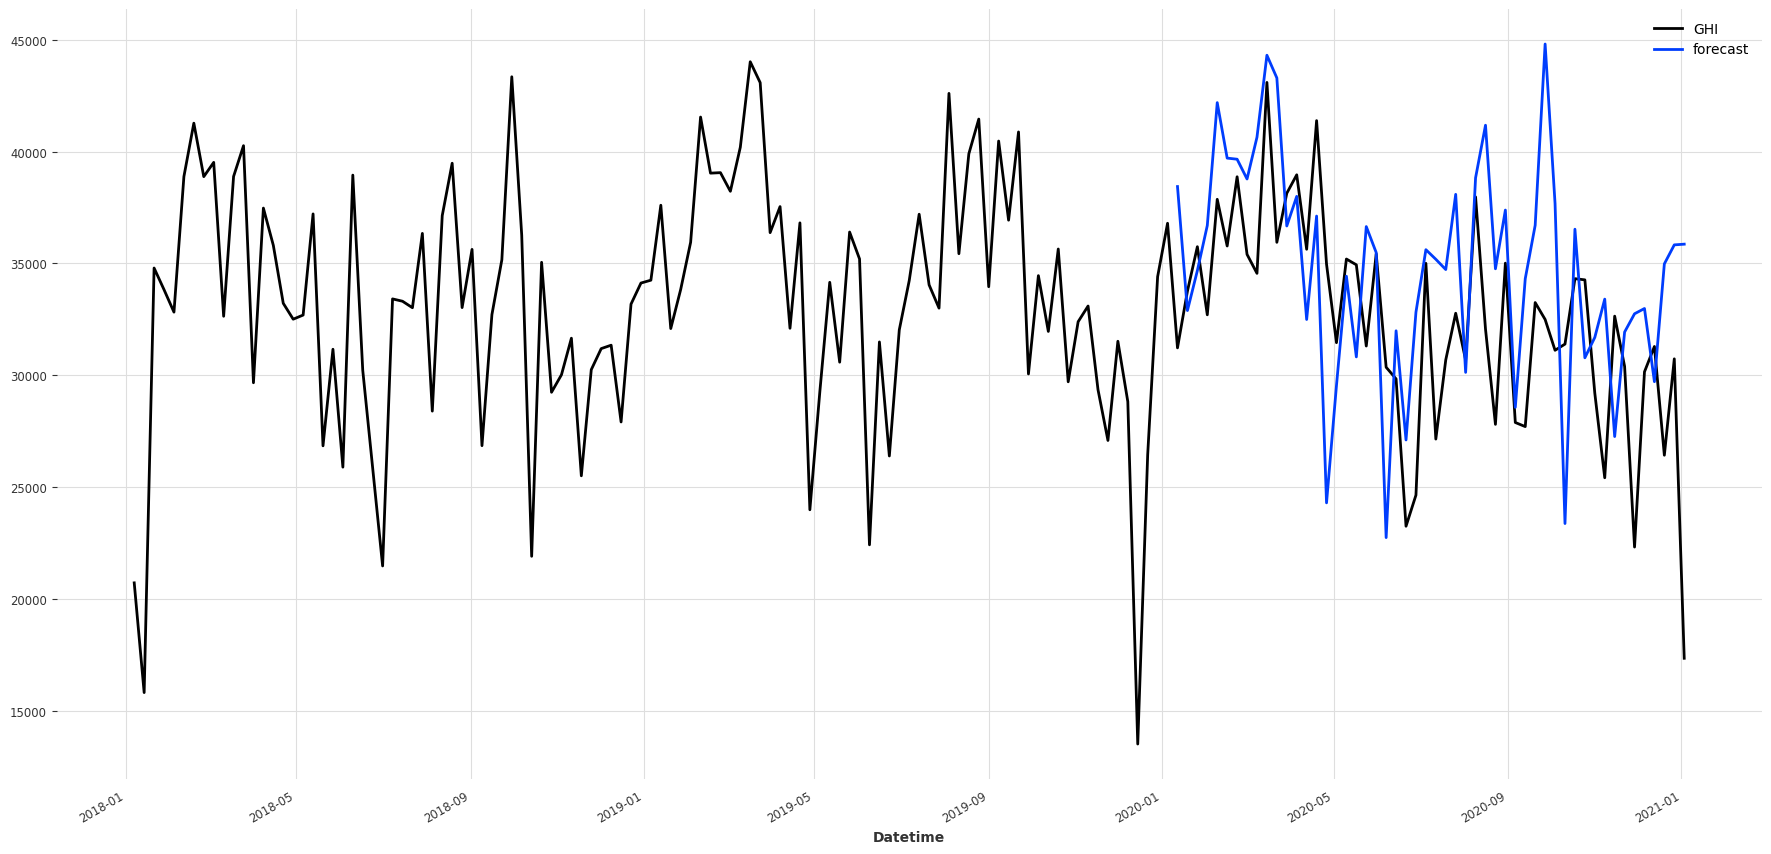

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(22,10))
series.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()